## **研究主題：探討PTT使用者對於新青安政策的討論與看法**

### 研究動機
隨著年齡增長，我的人生規劃也進一步推進，而購屋成為特別需要關注的一部分。政府在2023年8月推出「青年安心成家貸款精進方案」(簡稱新青安)，引發了許多年輕世代的討論，當我在搜尋相關資訊與心得時，注意到網路上存在許多不同甚至對立的意見，這使我想更深入了解人們如何看待這項政策，以及討論內容背後所反映的不同立場與價值觀。

### 研究背景
- 主要原因：房價飆漲，青年購屋困難  

政府希望減輕青年與首購族的購屋壓力，所以進一步推出此方案。申請條件為年滿18歲，且申請人本人、配偶與未成年子女名下均無自有住宅即可。貸款額度最高可到1000萬、成數最高8成、還款年限最長則至40年，寬限期則有5年，可以選擇「本息平均攤還」或是「本金平均攤還」。另外，如果符合條件，也可以與內政部的「自購住宅貸款利息補貼」併用。  

但是，這個方案上路後引起很多討論，有一部分的人認為這項政策確實能幫助年輕人購屋，像是更容易買到理想中的房子，或提早實現人生規劃；但也有人認為，除了房價可能漲得更快，房市也預期會出現拋售潮。
這些不同聲音讓「新青安」成為熱門話題，也帶動了PTT等網路社群的熱烈討論。

- 參考資料  
    - https://www.nta.gov.tw/singlehtml/109
    - https://www.businessweekly.com.tw/focus/indep/6015399
    - https://www.businessweekly.com.tw/business/blog/3016446

### 研究問題
- 民眾討論新青安時，整體情緒是偏正向還是負向？
- 在正面與負面意見中，常出現主題或議題有哪些？
- 如果時間上有變化趨勢，又可能跟哪些議題相關？

### 大綱
1. 資料前處理
2. Lecicon-base情緒分析

In [22]:
import pandas as pd
import re
import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 解決中文無法顯示問題
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']


In [2]:
%pwd

'c:\\NSYSU\\analytics_project\\nlp'

### 1. 資料前處理
#### 1.1 基本資料介紹
- 資料來源：PTT抓取Gossiping版
- 抓取時段：2023-08-01 至 2025-08-01
- 關鍵字：新青安、青年安心成家貸款、青安貸款、青年安心成家購屋、青年首購貸款

In [3]:
article = pd.read_csv('./raw_data/articles.csv')
comments = pd.read_csv('./raw_data/comments.csv')

In [4]:
print(f'共有{article.shape[0]}篇文章')
article.head()

共有3094篇文章


,title,time,url,content
0,[請益] 房貸選擇,2025/09/03 11:34,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益\n\n【A銀行】:\n8成\n新青安\n40年\n2年寬限期\n26萬壽險(不...
1,[新聞] 全台房價 自歷史高點回落0.59％,2025/09/03 11:40,https://www.ptt.cc/bbs/home-sale/M.1756870821....,全台房價 自歷史高點回落0.59％\n\n郭及天／台北報導\n2025年9月1日 週一 上午...
2,[請益] 關於內政部的自購住宅貸款利息補貼,2025/09/03 13:35,https://www.ptt.cc/bbs/home-sale/M.1756877717....,爬了許多文還是不太了解\n希望有大大能幫忙解答\n\n這麼說好了，目前我已經有申請新青安+5...
3,Re: [閒聊] 如果把所有房市政策鬆綁取消，台灣會變怎,2025/09/03 16:21,https://www.ptt.cc/bbs/home-sale/M.1756887702....,鬆綁怎麼就只鬆管制部份？你要回歸市場機制就要完全回歸。\n\n新青安就不用講，什麼首購最大這...
4,Re: [新聞] 金管會、央行邀銀行研議 開大房貸水龍頭,2025/09/02 17:14,https://www.ptt.cc/bbs/home-sale/M.1756804442....,: 連結：金管會、央行邀銀行研議 開大房貸水龍頭\n:\nhttps://www.ctee....


In [5]:
print(f'共有{comments.shape[0]}則留言')
comments.head()

共有206322則留言


,artTitle,artUrl,cmtUser,cmtTag,cmtContent,cmtIP,cmtTime
0,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,rgbff,推,選A然後去金管會檢舉?,NaN,2025/09/03 11:43
1,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,jkduke,推,選B 三年後換個銀行轉貸,NaN,2025/09/03 11:46
2,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,dontpushme,推,樓上讚,NaN,2025/09/03 11:46
3,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,hypolen,推,選b檢舉a,NaN,2025/09/03 11:50
4,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,dirk007,推,B,NaN,2025/09/03 11:58


In [6]:
# 確保抓取文章跟關鍵字是一致的
keywords = ['新青安','青年安心成家貸款','青安貸款','青年安心成家購屋','青年首購貸款']
match = '|'.join(keywords)

In [7]:
article = article.loc[article['title'].str.contains(match)|article['content'].str.contains(match), :]
article.reset_index(inplace=True, drop = True)
print(article.shape)

(3094, 4)


#### 1.2 資料清理
- 整理日期的輸出
- 去除NA值
- 去除非中文字詞

In [8]:
article['time'] = pd.to_datetime(article['time'])
article['date'] = article['time'].dt.date
article = article.drop('time',axis=1)
article

,title,url,content,date
0,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益\n\n【A銀行】:\n8成\n新青安\n40年\n2年寬限期\n26萬壽險(不...,2025-09-03
1,[新聞] 全台房價 自歷史高點回落0.59％,https://www.ptt.cc/bbs/home-sale/M.1756870821....,全台房價 自歷史高點回落0.59％\n\n郭及天／台北報導\n2025年9月1日 週一 上午...,2025-09-03
2,[請益] 關於內政部的自購住宅貸款利息補貼,https://www.ptt.cc/bbs/home-sale/M.1756877717....,爬了許多文還是不太了解\n希望有大大能幫忙解答\n\n這麼說好了，目前我已經有申請新青安+5...,2025-09-03
3,Re: [閒聊] 如果把所有房市政策鬆綁取消，台灣會變怎,https://www.ptt.cc/bbs/home-sale/M.1756887702....,鬆綁怎麼就只鬆管制部份？你要回歸市場機制就要完全回歸。\n\n新青安就不用講，什麼首購最大這...,2025-09-03
4,Re: [新聞] 金管會、央行邀銀行研議 開大房貸水龍頭,https://www.ptt.cc/bbs/home-sale/M.1756804442....,: 連結：金管會、央行邀銀行研議 開大房貸水龍頭\n:\nhttps://www.ctee....,2025-09-02
...,...,...,...,...
3089,[新聞] 減輕年輕人買房負擔！青安貸款升級版今上,https://www.ptt.cc/bbs/home-sale/M.1690905091....,減輕年輕人買房負擔！青安貸款升級版今上路 賴清德一張圖報你知\n\n連結：\nhttps:/...,2023-08-01
3090,Re: [閒聊] 85年次以後的年輕工程師有多慘？,https://www.ptt.cc/bbs/home-sale/M.1690910883....,原文恕刪\n背景交代一下\n小弟正好85年次\n前年台大非電資科系碩班畢業\n上山非產線常日...,2023-08-02
3091,Fw: [新聞] 新青安貸款威力開始了?網曝新北預售屋齊,https://www.ptt.cc/bbs/home-sale/M.1690938079....,作者: CNS3056 (奶奶) 看板: Gossiping\n標題: [新聞] 新青安貸款...,2023-08-02
3092,[新聞] 新青安房貸今上路 建商救命浮木來了？,https://www.ptt.cc/bbs/home-sale/M.1690887173....,連結：\nhttps://money.udn.com/money/story/5621/73...,2023-08-01


In [9]:
comments['cmtTime'] = pd.to_datetime(comments['cmtTime'])
comments['cmtDate'] = comments['cmtTime'].dt.date
comments = comments.drop(columns = ['cmtTime','cmtUser','cmtTag','cmtIP'])
comments

,artTitle,artUrl,cmtContent,cmtDate
0,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選A然後去金管會檢舉?,2025-09-03
1,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選B 三年後換個銀行轉貸,2025-09-03
2,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,樓上讚,2025-09-03
3,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選b檢舉a,2025-09-03
4,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,B,2025-09-03
...,...,...,...,...
206317,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,羨慕 我拿不到了,2023-08-01
206318,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,曾幾何時千萬代表豪宅 百萬代表名車 ..,2023-08-01
206319,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,放屁 沒救了 房價噴上去很難降,2023-08-01
206320,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,認真問，請問滿18歲的學生可以貸嗎？,2023-08-01


In [10]:
# 文章內容正規處理
article['content'] = article.content.apply(lambda x: re.sub('[^\u4e00-\u9fa5]+', '', x))
article

,title,url,content,date
0,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03
1,[新聞] 全台房價 自歷史高點回落0.59％,https://www.ptt.cc/bbs/home-sale/M.1756870821....,全台房價自歷史高點回落郭及天台北報導年月日週一上午去年月日央行第七波選擇性信用管制出爐成為這...,2025-09-03
2,[請益] 關於內政部的自購住宅貸款利息補貼,https://www.ptt.cc/bbs/home-sale/M.1756877717....,爬了許多文還是不太了解希望有大大能幫忙解答這麼說好了目前我已經有申請新青安年寬限期貸款是萬利...,2025-09-03
3,Re: [閒聊] 如果把所有房市政策鬆綁取消，台灣會變怎,https://www.ptt.cc/bbs/home-sale/M.1756887702....,鬆綁怎麼就只鬆管制部份你要回歸市場機制就要完全回歸新青安就不用講什麼首購最大這種鳥觀念也都要...,2025-09-03
4,Re: [新聞] 金管會、央行邀銀行研議 開大房貸水龍頭,https://www.ptt.cc/bbs/home-sale/M.1756804442....,連結金管會央行邀銀行研議開大房貸水龍頭內文民眾想買房卻貸不到款卓揆日前喊話希望銀行放款水龍頭...,2025-09-02
...,...,...,...,...
3089,[新聞] 減輕年輕人買房負擔！青安貸款升級版今上,https://www.ptt.cc/bbs/home-sale/M.1690905091....,減輕年輕人買房負擔青安貸款升級版今上路賴清德一張圖報你知連結內文記者盧素梅台北報導青年安心成...,2023-08-01
3090,Re: [閒聊] 85年次以後的年輕工程師有多慘？,https://www.ptt.cc/bbs/home-sale/M.1690910883....,原文恕刪背景交代一下小弟正好年次前年台大非電資科系碩班畢業上山非產線常日班目前年資剛好兩年家...,2023-08-02
3091,Fw: [新聞] 新青安貸款威力開始了?網曝新北預售屋齊,https://www.ptt.cc/bbs/home-sale/M.1690938079....,作者奶奶看板標題新聞新青安貸款威力開始了網曝新北預售屋齊時間媒體來源記者署名余奕賢完整新聞標...,2023-08-02
3092,[新聞] 新青安房貸今上路 建商救命浮木來了？,https://www.ptt.cc/bbs/home-sale/M.1690887173....,連結內文經濟日報記者游智文即時報導新版青年安心成家優惠房貸專案今日上路元宏不動產加值服務平台...,2023-08-01


In [11]:
# 留言正規處理
comments['cmtContent'] = comments.cmtContent.astype(str).apply(lambda x: re.sub('[^\u4e00-\u9fa5]+', '', x))
comments = comments[comments['cmtContent'].str.strip() != '']
comments

,artTitle,artUrl,cmtContent,cmtDate
0,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選然後去金管會檢舉,2025-09-03
1,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選三年後換個銀行轉貸,2025-09-03
2,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,樓上讚,2025-09-03
3,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選檢舉,2025-09-03
5,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,還敢綁壽險阿,2025-09-03
...,...,...,...,...
206317,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,羨慕我拿不到了,2023-08-01
206318,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,曾幾何時千萬代表豪宅百萬代表名車,2023-08-01
206319,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,放屁沒救了房價噴上去很難降,2023-08-01
206320,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,認真問請問滿歲的學生可以貸嗎,2023-08-01


#### 1.3 斷詞與移除停用字
- 設定中文詞庫
- 斷詞使用Jieba

**文章部分**

In [12]:
# 設定繁體中文詞庫
jieba.set_dictionary('./dict/dict.txt.big')
# 設定自定義詞庫
jieba.load_userdict('./dict/user_dict.txt')

# 停用字
with open('./dict/stopwords.txt', encoding='utf-8') as f:
    stopwords = [line.strip() for line in f.readlines()]

Building prefix dict from c:\NSYSU\analytics_project\nlp\dict\dict.txt.big ...
Loading model from cache C:\Users\Shelly\AppData\Local\Temp\jieba.u0f7b98df0d0af54dc1d176608c9315c1.cache
Loading model cost 1.097 seconds.
Prefix dict has been built successfully.


In [13]:
# 針對文章內容進行斷詞
article_token = article.assign(word=article['content'].apply(lambda x: jieba.lcut(x))).explode('word').reset_index(drop=True)


In [14]:
article_token

,title,url,content,date,word
0,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,貸款
1,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,選擇
2,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,請益
3,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,銀行
4,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,成
...,...,...,...,...,...
1120774,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,上車
1120775,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,的
1120776,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,乘客
1120777,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,請


In [15]:
article_token = article_token.loc[article_token['word'].str.len()>1]
article_token

,title,url,content,date,word
0,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,貸款
1,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,選擇
2,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,請益
3,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,銀行
5,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,新青安
...,...,...,...,...,...
1120771,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,啟動
1120773,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,還沒
1120774,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,上車
1120776,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,乘客


In [16]:
with open('./dict/stopwords.txt',encoding = 'utf-8') as f:
    stopwords = [line.strip() for line in f.readlines()]

article_token = article_token.loc[~article_token['word'].isin(stopwords)]
article_token

,title,url,content,date,word
0,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,貸款
1,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,選擇
2,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,請益
3,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,銀行
5,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,新青安
...,...,...,...,...,...
1120771,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,啟動
1120773,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,還沒
1120774,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,上車
1120776,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,乘客


**留言部分**

In [17]:
# 針對留言進行斷詞
comments = comments.assign(word=comments['cmtContent'].apply(lambda x: jieba.lcut(x))).explode('word').reset_index(drop=True)
comments= comments.loc[comments['word'].str.len()>1]
comments

,artTitle,artUrl,cmtContent,cmtDate,word
1,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選然後去金管會檢舉,2025-09-03,然後
3,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選然後去金管會檢舉,2025-09-03,金管會
4,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選然後去金管會檢舉,2025-09-03,檢舉
6,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選三年後換個銀行轉貸,2025-09-03,三年
8,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選三年後換個銀行轉貸,2025-09-03,換個
...,...,...,...,...,...
1797284,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,認真問請問滿歲的學生可以貸嗎,2023-08-01,滿歲
1797286,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,認真問請問滿歲的學生可以貸嗎,2023-08-01,學生
1797287,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,認真問請問滿歲的學生可以貸嗎,2023-08-01,可以
1797290,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,全面救金主嗎,2023-08-01,全面


In [18]:
with open('./dict/stopwords.txt',encoding = 'utf-8') as f:
    stopwords = [line.strip() for line in f.readlines()]

comments = comments.loc[~comments['word'].isin(stopwords)]
comments

,artTitle,artUrl,cmtContent,cmtDate,word
3,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選然後去金管會檢舉,2025-09-03,金管會
4,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選然後去金管會檢舉,2025-09-03,檢舉
6,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選三年後換個銀行轉貸,2025-09-03,三年
8,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選三年後換個銀行轉貸,2025-09-03,換個
9,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選三年後換個銀行轉貸,2025-09-03,銀行
...,...,...,...,...,...
1797283,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,認真問請問滿歲的學生可以貸嗎,2023-08-01,請問
1797284,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,認真問請問滿歲的學生可以貸嗎,2023-08-01,滿歲
1797286,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,認真問請問滿歲的學生可以貸嗎,2023-08-01,學生
1797290,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,全面救金主嗎,2023-08-01,全面


In [19]:
# 合併斷詞後的文章與留言
comments = comments.rename(columns={'cmtDate':'date', 'artUrl':'url'})
data = pd.concat([article_token.loc[:,["date","url","word"]],comments.loc[:,["date","url","word"]]],axis=0)
data

,date,url,word
0,2025-09-03,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款
1,2025-09-03,https://www.ptt.cc/bbs/home-sale/M.1756870456....,選擇
2,2025-09-03,https://www.ptt.cc/bbs/home-sale/M.1756870456....,請益
3,2025-09-03,https://www.ptt.cc/bbs/home-sale/M.1756870456....,銀行
5,2025-09-03,https://www.ptt.cc/bbs/home-sale/M.1756870456....,新青安
...,...,...,...
1797283,2023-08-01,https://www.ptt.cc/bbs/home-sale/M.1690847681....,請問
1797284,2023-08-01,https://www.ptt.cc/bbs/home-sale/M.1690847681....,滿歲
1797286,2023-08-01,https://www.ptt.cc/bbs/home-sale/M.1690847681....,學生
1797290,2023-08-01,https://www.ptt.cc/bbs/home-sale/M.1690847681....,全面


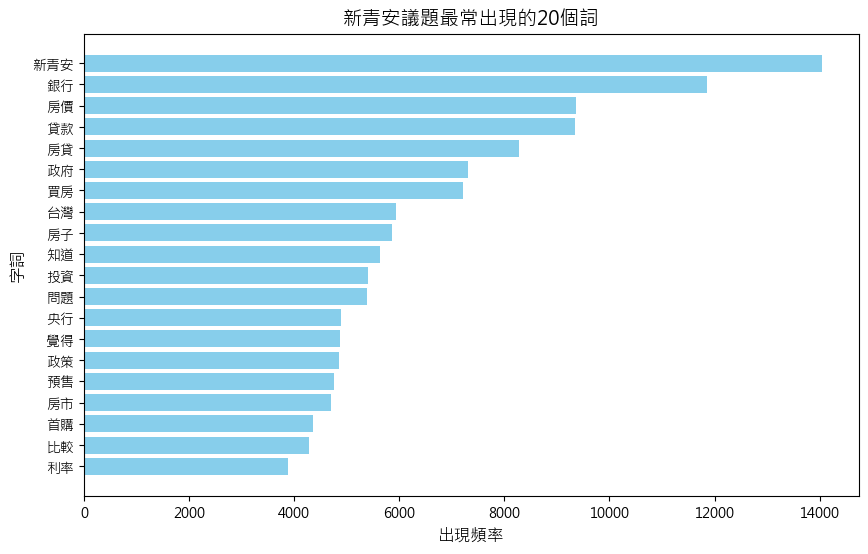

In [70]:
# 計算常出現的字
word_frq = data.groupby(['word'],as_index=False).size()
word_frq.sort_values(by=['size'], ascending=False,inplace=True)  #排序
word_frq = word_frq[word_frq['size']>10]  # 過濾出現太少次的字

# 繪製前20常出現的字
n = 20
plot_n = word_frq.head(20)

plt.figure(figsize = (10,6))
plt.barh(plot_n['word'], plot_n['size'], color = 'skyblue')
plt.xlabel('出現頻率', fontsize = 12)
plt.ylabel('字詞', fontsize = 12)
plt.title('新青安議題最常出現的20個詞', fontsize = 14)
plt.gca().invert_yaxis()
plt.show()

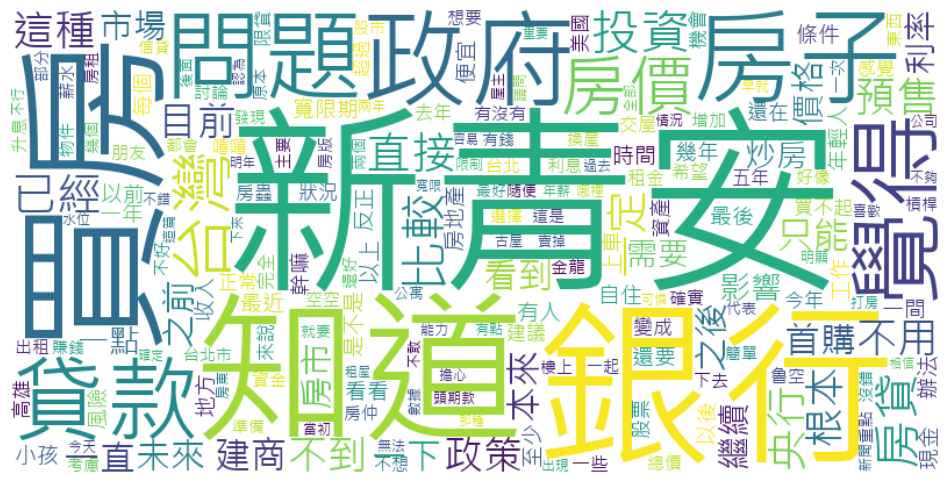

In [29]:
# 繪製文字雲
word = " ".join(data['word'].to_list())

wc = WordCloud(
    font_path='msjh.ttc',
    width = 800,
    height = 400, background_color='white'
).generate(word)

plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### 2. Lexicon-based 情緒分析 

In [30]:
# 載入liwc檔案

# 建立空的list
d_liwc = []

for label in ["positive", "negative"]:
    filename = f"./liwc/{label}.txt"
    with open(filename, "r", encoding="utf-8") as f:
        # 讀檔，以逗號分開
        words = f.read().strip().split(",")
        words = [w.strip() for w in words if w.strip()]  # 去掉空白
        for w in words:
            d_liwc.append([w, label])

df_liwc = pd.DataFrame(d_liwc, columns=["word", "sentiments"])

In [31]:
df_liwc

,word,sentiments
0,﻿一流,positive
1,下定決心,positive
2,不拘小節,positive
3,不費力,positive
4,不錯,positive
...,...,...
1706,麻煩,negative
1707,默哀,negative
1708,黯淡,negative
1709,鼻酸,negative


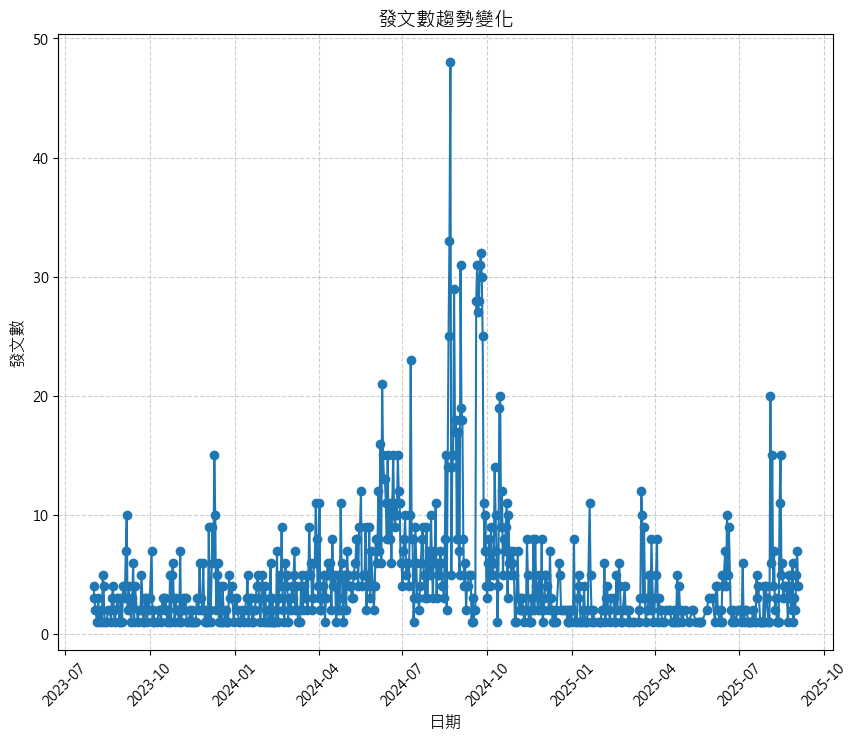

In [32]:
article['date'] = pd.to_datetime(article['date'], errors= 'coerce') # pd.to_datetime語法 : errors用來處理轉換失敗的值
create_frq = article.groupby(article['date'].dt.date).size()

plt.figure(figsize=(10,8))
plt.plot(create_frq.index, create_frq.values, marker = 'o', linestyle = '-')
plt.title('發文數趨勢變化',fontsize = 14)
plt.xlabel('日期', fontsize = 12)
plt.ylabel('發文數', fontsize = 12)
plt.xticks(rotation = 45)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.show()


In [83]:
create_frq.sort_values(ascending=False).head(10)

date
2024-08-22    48
2024-08-21    33
2024-09-24    32
2024-09-02    31
2024-09-23    31
2024-09-20    31
2024-09-25    30
2024-08-26    29
2024-09-22    28
2024-09-19    28
dtype: int64

此部分進一步分析發文數前10名的日期，並檢視其內文與標題，辨識當時被熱烈討論的議題，並嘗試連結可能的外部事件脈絡。

In [37]:
df_liwc

,word,sentiments
0,﻿一流,positive
1,下定決心,positive
2,不拘小節,positive
3,不費力,positive
4,不錯,positive
...,...,...
1706,麻煩,negative
1707,默哀,negative
1708,黯淡,negative
1709,鼻酸,negative


#### 2.1 正負向情緒分數聲量折線圖

In [36]:
# 合併文章斷詞與情緒字典(保留同時存在於文章裡，又在情緒字典裡的詞)
data_liwc = pd.merge(article_token, df_liwc, on='word', how='inner')
data_liwc

,title,url,content,date,word,sentiments
0,[請益] 房貸選擇,https://www.ptt.cc/bbs/home-sale/M.1756870456....,貸款選擇請益銀行成新青安年年寬限期萬壽險不可分期銀行成年年寬限期無壽險請問包含壽險部分值得選...,2025-09-03,值得,positive
1,[新聞] 全台房價 自歷史高點回落0.59％,https://www.ptt.cc/bbs/home-sale/M.1756870821....,全台房價自歷史高點回落郭及天台北報導年月日週一上午去年月日央行第七波選擇性信用管制出爐成為這...,2025-09-03,無力,negative
2,[新聞] 全台房價 自歷史高點回落0.59％,https://www.ptt.cc/bbs/home-sale/M.1756870821....,全台房價自歷史高點回落郭及天台北報導年月日週一上午去年月日央行第七波選擇性信用管制出爐成為這...,2025-09-03,支撐,positive
3,[新聞] 全台房價 自歷史高點回落0.59％,https://www.ptt.cc/bbs/home-sale/M.1756870821....,全台房價自歷史高點回落郭及天台北報導年月日週一上午去年月日央行第七波選擇性信用管制出爐成為這...,2025-09-03,驚人,positive
4,[新聞] 全台房價 自歷史高點回落0.59％,https://www.ptt.cc/bbs/home-sale/M.1756870821....,全台房價自歷史高點回落郭及天台北報導年月日週一上午去年月日央行第七波選擇性信用管制出爐成為這...,2025-09-03,驚人,negative
...,...,...,...,...,...,...
31450,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,不利,negative
31451,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,協助,positive
31452,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,免費,positive
31453,Fw: [新聞] 青年購屋貸款8/1新制「加碼」上路 額度最高千萬、年限,https://www.ptt.cc/bbs/home-sale/M.1690847681....,作者看板標題新聞青年購屋貸款新制加碼上路額度最高千萬年限延長面向減壓升級降低買房負擔時間青年...,2023-08-01,相信,positive


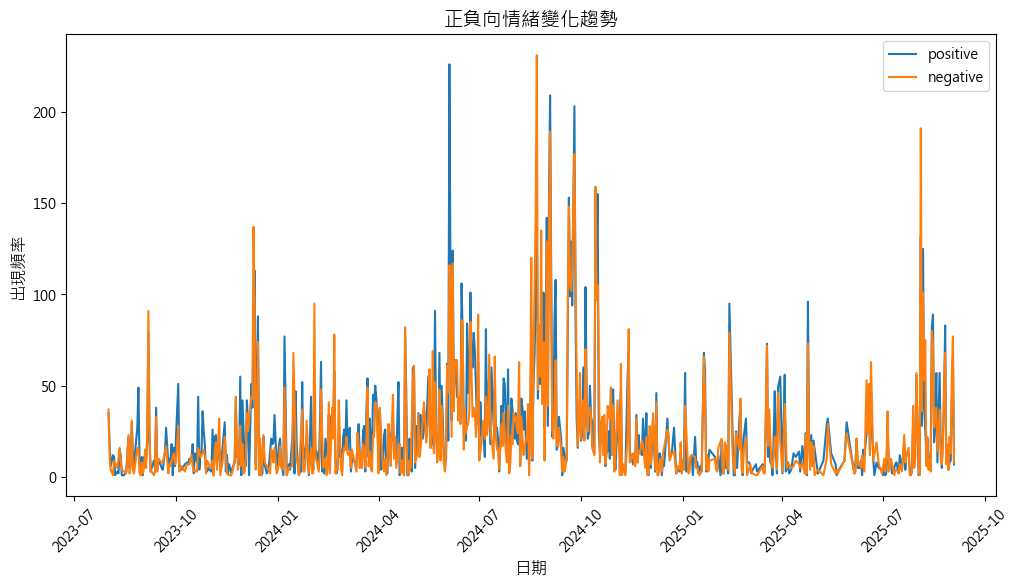

In [49]:
# 計算每日的情緒數量並繪製成折線圖
sentiment_count = (data_liwc.groupby(['date','sentiments']).size().reset_index(name='count'))

plt.figure(figsize=(12,6))
for sentiment in ['positive','negative']: # 分別處理
    subset = sentiment_count[sentiment_count['sentiments'] == sentiment]
    plt.plot(subset['date'], subset['count'], label = sentiment)

plt.legend()
plt.title('正負向情緒變化趨勢', fontsize = 14)
plt.xlabel('日期', fontsize = 12)
plt.ylabel('出現頻率', fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

#### 2.2 正負向情緒分數比例折線圖